In [1]:
from educe.rst_dt.dep_corpus import read_corpus, read_deps

First, we collect the (raw) dependencies from the RST-DT corpus.

In [2]:
DATA_DIR = '/home/mmorey/corpora/rst-dt/rst_discourse_treebank/data/RSTtrees-WSJ-main-1.0'
corpus = read_corpus(DATA_DIR, section='all', verbose=True)
edu_df, dep_df = read_deps(corpus, section='all', nary_enc='chain', rew_pseudo_rels=False, mrg_same_units=False)

Slurping corpus dir [347/347 done]
Slurping corpus dir [38/38 done]


In [3]:
dep_df

,doc_name,dep_idx,hd_idx,rel,nuc,hd_order,len_edu,len_edu_abs,rel_class,pseudo_rel
0,wsj_0602.out,1,0,ROOT,Nucleus,1,1,1,root,False
1,wsj_0602.out,2,1,TextualOrganization,Nucleus,1,1,1,textual,True
2,wsj_0602.out,3,2,Contrast,Nucleus,1,1,1,contrast,False
3,wsj_0602.out,4,2,elaboration-set-member,Satellite,2,2,2,elaboration,False
4,wsj_0602.out,5,4,elaboration-general-specific,Satellite,1,1,1,elaboration,False
5,wsj_0602.out,6,4,definition,Satellite,2,2,2,elaboration,False
6,wsj_0602.out,7,4,List,Nucleus,3,3,3,joint,False
7,wsj_0602.out,8,7,elaboration-general-specific,Satellite,1,1,1,elaboration,False
8,wsj_0602.out,9,7,definition,Satellite,2,2,2,elaboration,False
9,wsj_0602.out,10,9,elaboration-object-attribute-e,Satellite,1,1,1,elaboration,False


In [4]:
%matplotlib inline
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_context("paper")
sns.set(rc={"figure.figsize": (18, 4)})

In [5]:
abs_len_edu = dep_df['len_edu_abs']

In [6]:
abs_len_edu.describe()

count    21789.000000
mean         3.650925
std          9.151136
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        214.000000
Name: len_edu_abs, dtype: float64

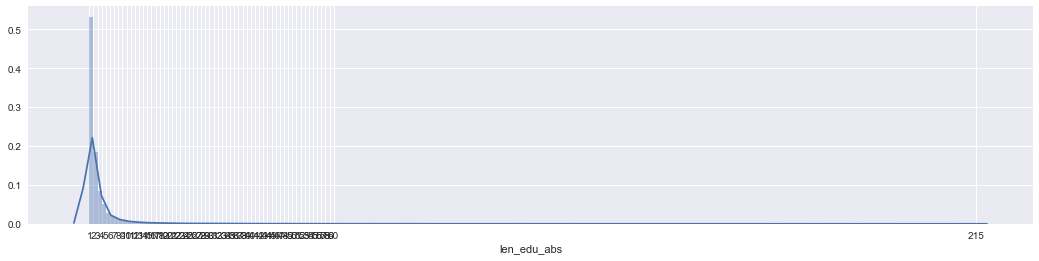

In [7]:
bins = np.hstack((np.arange(abs_len_edu.min(), 61),
                  np.array([abs_len_edu.max() + 1])))
len_dist = sns.distplot(abs_len_edu, bins=bins, rug=False)
len_dist.set(xticks=bins)
len_dist

Now let's re-read the corpus, but this time we rewrite pseudo-relations and exclude "true" pseudo-relations.

In [8]:
edu2_df, dep_df_rew = read_deps(corpus, section='all', nary_enc='chain', rew_pseudo_rels=True, mrg_same_units=True)
dep2_df = dep_df_rew[~dep_df_rew['pseudo_rel']]

In [9]:
dep2_df

,doc_name,dep_idx,hd_idx,rel,nuc,hd_order,len_edu,len_edu_abs,rel_class,pseudo_rel
0,wsj_0602.out,1,0,ROOT,Nucleus,1,1,1,root,False
1,wsj_0602.out,2,1,summary-n,Satellite,1,1,1,summary,False
2,wsj_0602.out,3,2,Contrast,Nucleus,1,1,1,contrast,False
3,wsj_0602.out,4,2,elaboration-set-member,Satellite,2,2,2,elaboration,False
4,wsj_0602.out,5,4,elaboration-general-specific,Satellite,1,1,1,elaboration,False
5,wsj_0602.out,6,4,definition,Satellite,2,2,2,elaboration,False
6,wsj_0602.out,7,4,List,Nucleus,3,3,3,joint,False
7,wsj_0602.out,8,7,elaboration-general-specific,Satellite,1,1,1,elaboration,False
8,wsj_0602.out,9,7,definition,Satellite,2,2,2,elaboration,False
9,wsj_0602.out,10,9,elaboration-object-attribute-e,Satellite,1,1,1,elaboration,False


In [10]:
abs_len_edu2 = dep2_df['len_edu_abs']
abs_len_edu2.describe()

count    18080.000000
mean         3.274170
std          7.380188
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        202.000000
Name: len_edu_abs, dtype: float64

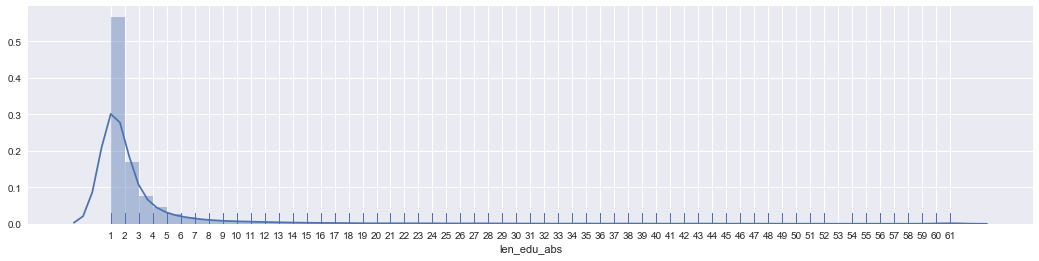

In [11]:
bins2 = np.arange(abs_len_edu2.min(), 62)
# clip values above 60 to 61
len_dist2 = sns.distplot(np.clip(abs_len_edu2, bins2[0], bins2[-1]), bins=bins2, rug=True)
len_dist2.set(xticks=bins2)
# TODO set label to 60+ for values clipped to 61
# see https://stackoverflow.com/a/30305331
len_dist2

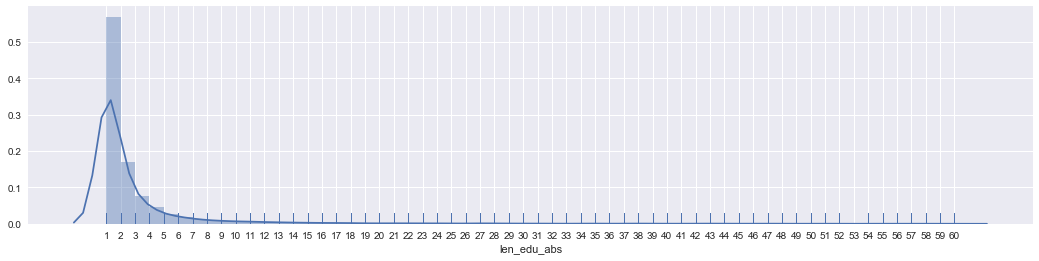

In [12]:
# try to ignore values above 60, as suggested by NA
bins2 = np.arange(abs_len_edu2.min(), 61)
# clip values above 60 to 61
len_dist2 = sns.distplot(abs_len_edu2[abs_len_edu2 <= 60], bins=bins2, rug=True)
len_dist2.set(xticks=bins2)
# TODO set label to 60+ for values clipped to 61
# see https://stackoverflow.com/a/30305331
len_dist2

Roughly compare the distributions, on the raw vs rewritten and filtered dependencies.

In [13]:
(dep_df['len_edu_abs'].value_counts() / len(dep_df))[:15]

1     0.532471
2     0.184680
3     0.084630
4     0.050117
5     0.028822
6     0.020515
7     0.013631
8     0.011565
9     0.008858
10    0.007068
11    0.005232
13    0.004314
12    0.004314
14    0.003947
17    0.002524
Name: len_edu_abs, dtype: float64

In [14]:
(dep2_df['len_edu_abs'].value_counts() / len(dep2_df))[:15]

1     0.567920
2     0.170077
3     0.077434
4     0.045907
5     0.026438
6     0.019856
7     0.013772
8     0.010011
9     0.008131
10    0.006416
11    0.006250
12    0.004646
13    0.004148
14    0.003319
15    0.002876
Name: len_edu_abs, dtype: float64

Our handle on the corpus enables us to display trees or tree fragments.
This reveals quite handy to explore the RST-DT and compare its attachments with those in the STAC corpus.
For example, backwards links in STAC are only allowed inside a turn, whereas they are unconstrained in the RST-DT because the definition of dependencies relies on nuclearity.

In [15]:
# query backwards dependencies of length > 1
bw_deps = dep2_df[(dep2_df['len_edu'] < -1)]
bw_deps

,doc_name,dep_idx,hd_idx,rel,nuc,hd_order,len_edu,len_edu_abs,rel_class,pseudo_rel
92,wsj_0616.out,14,16,condition,Satellite,2,-2,2,condition,False
104,wsj_0616.out,26,28,background,Satellite,3,-2,2,background,False
106,wsj_0616.out,28,31,result,Satellite,2,-3,3,cause,False
137,wsj_0616.out,59,61,concession,Satellite,3,-2,2,contrast,False
193,wsj_0627.out,17,19,comment,Satellite,3,-2,2,evaluation,False
207,wsj_0627.out,31,36,antithesis,Satellite,3,-5,5,contrast,False
209,wsj_0627.out,33,36,attribution,Satellite,2,-3,3,attribution,False
210,wsj_0627.out,34,36,concession,Satellite,1,-2,2,contrast,False
215,wsj_0627.out,39,41,attribution,Satellite,2,-2,2,attribution,False
238,wsj_0627.out,62,64,antithesis,Satellite,2,-2,2,contrast,False


The modelling assumptions of RST and SDRT could result in different dependency configurations when, in RST, a head has several dependents (tree structure) whereas SDRT would model this as a chain.

In [16]:
sev_deps = dep2_df.groupby(by=['doc_name', 'hd_idx'])
# FIXME filter groups of len > 1, directly on the GroupBy object
i = 0
for k, grp in sev_deps:
    if len(grp) > 1:
        print(k, grp)
        i += 1
        if i > 10:
            raise ValueError("gne")


(('file1', 2),      doc_name  dep_idx  hd_idx                        rel        nuc  \
2040    file1        1       2                 concession  Satellite   
2042    file1        3       2  explanation-argumentative  Satellite   
2044    file1        5       2                   evidence  Satellite   

      hd_order  len_edu  len_edu_abs    rel_class  pseudo_rel  
2040         2       -1            1     contrast       False  
2042         1        1            1  explanation       False  
2044         3        3            3  explanation       False  )
(('file1', 6),      doc_name  dep_idx  hd_idx          rel        nuc  hd_order  len_edu  \
2041    file1        2       6   background  Satellite         4       -4   
2046    file1        7       6        means  Satellite         1        1   
2047    file1        8       6     evidence  Satellite         2        2   
2056    file1       17       6  restatement  Satellite         3       11   

      len_edu_abs     rel_class  pseud

ValueError: gne

In [ ]:
from educe.annotation import Span
from educe.corpus import FileId
import educe.rst_dt
# grab an example backwards link from test/wsj_0616
ex_key = educe.rst_dt.mk_key("wsj_0616.out")
ex_doc = corpus['test'][ex_key]
print(ex_doc)

In [ ]:
# looks like we found an inter-sentential backwards link
ex_doc.text()
# ex_doc.leaves()[37].text()
# ex_doc.leaves()[35].text()

In [ ]:
# and another inter-sentential backwards link
ex_doc.text()[1737:2150]